In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [2]:
PROJ_DIR = "/Users/spare/Desktop/BIODS215/project/"
template = os.path.join(PROJ_DIR, "wearables/Basis_Watch_Data_Processed/Basis_{}.csv")

## DFT Example

/Users/spare/Desktop/BIODS215/project/ipop/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


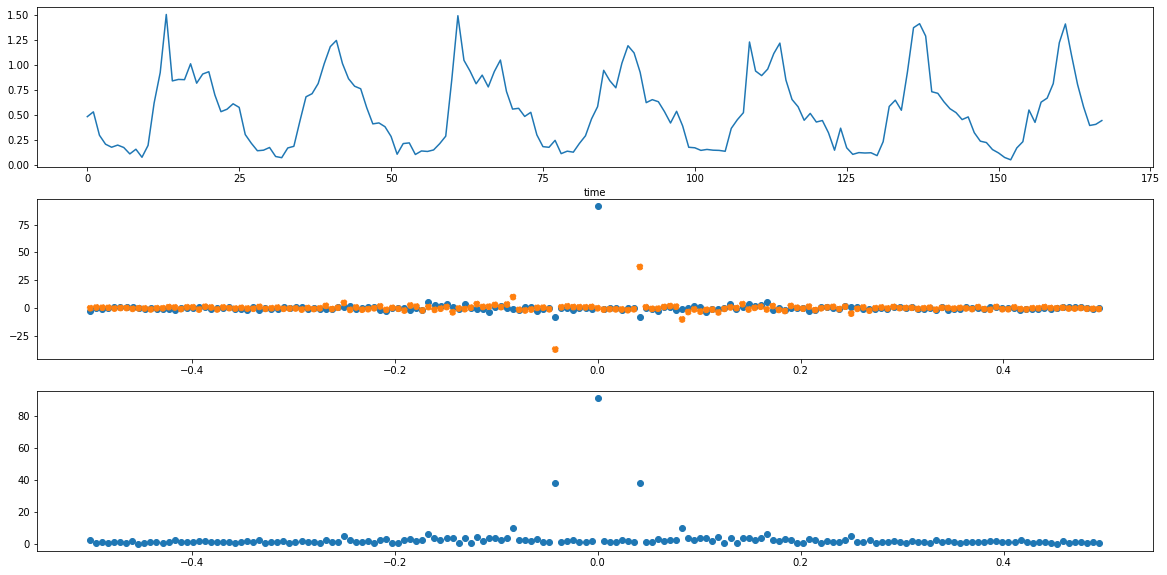

In [5]:
df = pd.read_csv(template.format('017'), index_col=0)

fig, a = plt.subplots(3, 1, figsize=(20, 10))
df = pd.read_csv(template.format('017'), index_col=0)
week_df = df.groupby(["weekday", "hour"]).accel_magnitude.mean().reset_index()
week_df.accel_magnitude /= df.accel_magnitude.std()
a[0].plot(range(len(week_df)), week_df.accel_magnitude)
a[0].set_xlabel('time')

ft = np.fft.fft(week_df.accel_magnitude)
freq = np.fft.fftfreq(len(week_df.accel_magnitude))

a[1].scatter(freq, ft.real, label='real')
a[1].scatter(freq, ft.imag, linestyle="--", label="imag")

a[2].scatter(freq, np.abs(ft))

#plt.savefig('/Users/spare/Desktop/BIODS215/project/plots/anti_representatives_dft.png', dpi=300)
plt.show()